\newpage

# Attention
Due to the exploratory data analysis procedure, we didn't follow the problem order. For the first six problems, the order is 1-3-5-2-6-4. The rest problems are in correct order. Please be aware of this issue and sorry for the inconvenience.

\newpage

# Prerequisite Work: Data Acquisition

Based on the instruction, we need to install ucimlrepo package to get the dataset. The dataset is available in the package. 


In [1]:
%pip install ucimlrepo

  Using cached ucimlrepo-0.0.6-py3-none-any.whl (8.0 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

In [3]:
y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


## 1. Problem Indentification


Given the Chronic Kidney Disease (CKD) dataset, there are 400 patients' data and each data has 25 medical indicators value (features). The prediction target is the existences of Chronic Kidney Disease in patients, given the label of "ckd" and "notckd". In this case, our binary classification problem is to predict the presence of chronic kidney disease in patients based on medical diagnostic features.

The prediction outcome will be either 0 representing the patient does not have CKD, and 1 representing the patient has CKD.


In [4]:
X.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,12.4,36.0,NaN,NaN,no,no,no,good,no,no
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes


In [5]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


## 3. Data Overview


The size of data is 400 and there are 15 numerical features and 10 categorical features beside of predicting label. The dataset likely includes a wide range of ages, reflecting CKD's impact across both adult and potentially older populations. Blood pressure (bp) values would also vary significantly, as hypertension is a common comorbidity in CKD patients

Initially, the dataset contained a considerable amount of missing values, 'nan', in the columns such as 'rbc' and 'wbcc'. These missing values need to be handled by data cleaning and imputation to prepare the dataset for accurate and effective analysis.

Key indicators of kidney function such as serum creatinine, hemoglobin, and the specific gravity of urine would show distinct distributions between healthy individuals and those with CKD. These variables are indicative of deteriorating kidney function, which provide deep insigths for diagnosing CKD.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA

In [7]:
numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad','appet', 'pe', 'ane']

## 5. Missing Value Analysis and Handling

In [8]:

X[categorical_columns] = SimpleImputer(strategy="most_frequent").fit_transform(X[categorical_columns])
X[numeric_columns] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X[numeric_columns])

/tmp/ipykernel_480/939063244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = SimpleImputer(strategy="most_frequent").fit_transform(X[categorical_columns])
/tmp/ipykernel_480/939063244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_columns] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X[numeric_columns])


## 2. Variable Transformation

In [9]:
for col in numeric_columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')


one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = one_hot_encoder.fit_transform(X[categorical_columns])
encoded_features = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
X = pd.concat([X[numeric_columns], encoded_features], axis=1)


y.replace('notckd', 0, inplace=True)
y.replace('ckd', 1, inplace=True)

/tmp/ipykernel_480/1738126669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_480/1738126669.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace('notckd', 0, inplace=True)
/tmp/ipykernel_480/1738126669.py:12: SettingWithCo

Heatmap for correlation of the attributes:


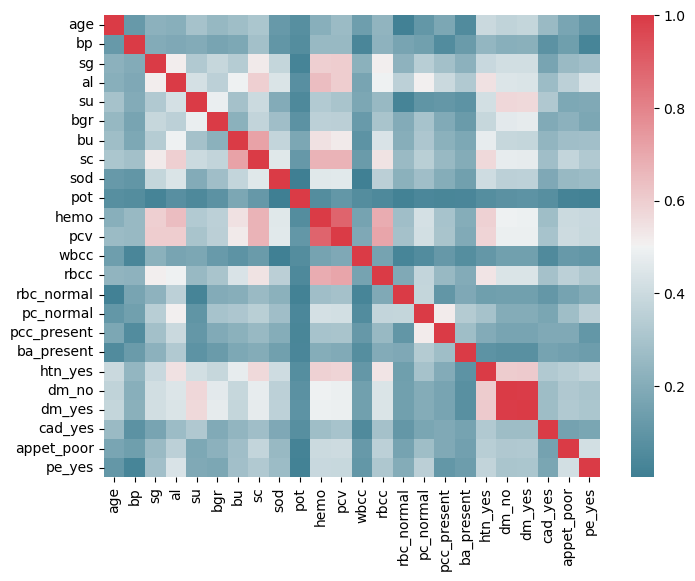

In [10]:
corr = X.iloc[:, 0:-1].astype(float).corr(method='spearman').abs()
print("Heatmap for correlation of the attributes:")
ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [11]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X = X.drop(columns=to_drop)

In [12]:
for cc in one_hot_encoder.get_feature_names_out(categorical_columns):
    if cc in X.columns:
        crosstab = pd.crosstab(X[cc], y['class'])
        chi2, p_value, dof, expected = chi2_contingency(crosstab)

        print("Chi-square test result for", cc, "and CKD status:")
        print("Chi2 Statistic:", chi2)
        print("P-value:", p_value)

Chi-square test result for rbc_normal and CKD status:
Chi2 Statistic: 32.641871516037654
P-value: 8.164087689880157e-08
Chi-square test result for pc_normal and CKD status:
Chi2 Statistic: 56.79955563939718
P-value: 4.635890887212827e-13
Chi-square test result for pcc_present and CKD status:
Chi2 Statistic: 30.521157823374445
P-value: 2.357299629845781e-07
Chi-square test result for ba_present and CKD status:
Chi2 Statistic: 14.268646526711043
P-value: 0.0007972651388996263
Chi-square test result for htn_yes and CKD status:
Chi2 Statistic: 140.9189354691258
P-value: 2.5109725500915517e-31
Chi-square test result for dm_no and CKD status:
Chi2 Statistic: 128.20287713813616
P-value: 1.4491019717851277e-28
Chi-square test result for cad_yes and CKD status:
Chi2 Statistic: 22.774546095540284
P-value: 1.1338879798216138e-05
Chi-square test result for appet_poor and CKD status:
Chi2 Statistic: 67.47324198744117
P-value: 2.230343035432748e-15
Chi-square test result for pe_yes and CKD status:
C

Histogram plots for the attributes:


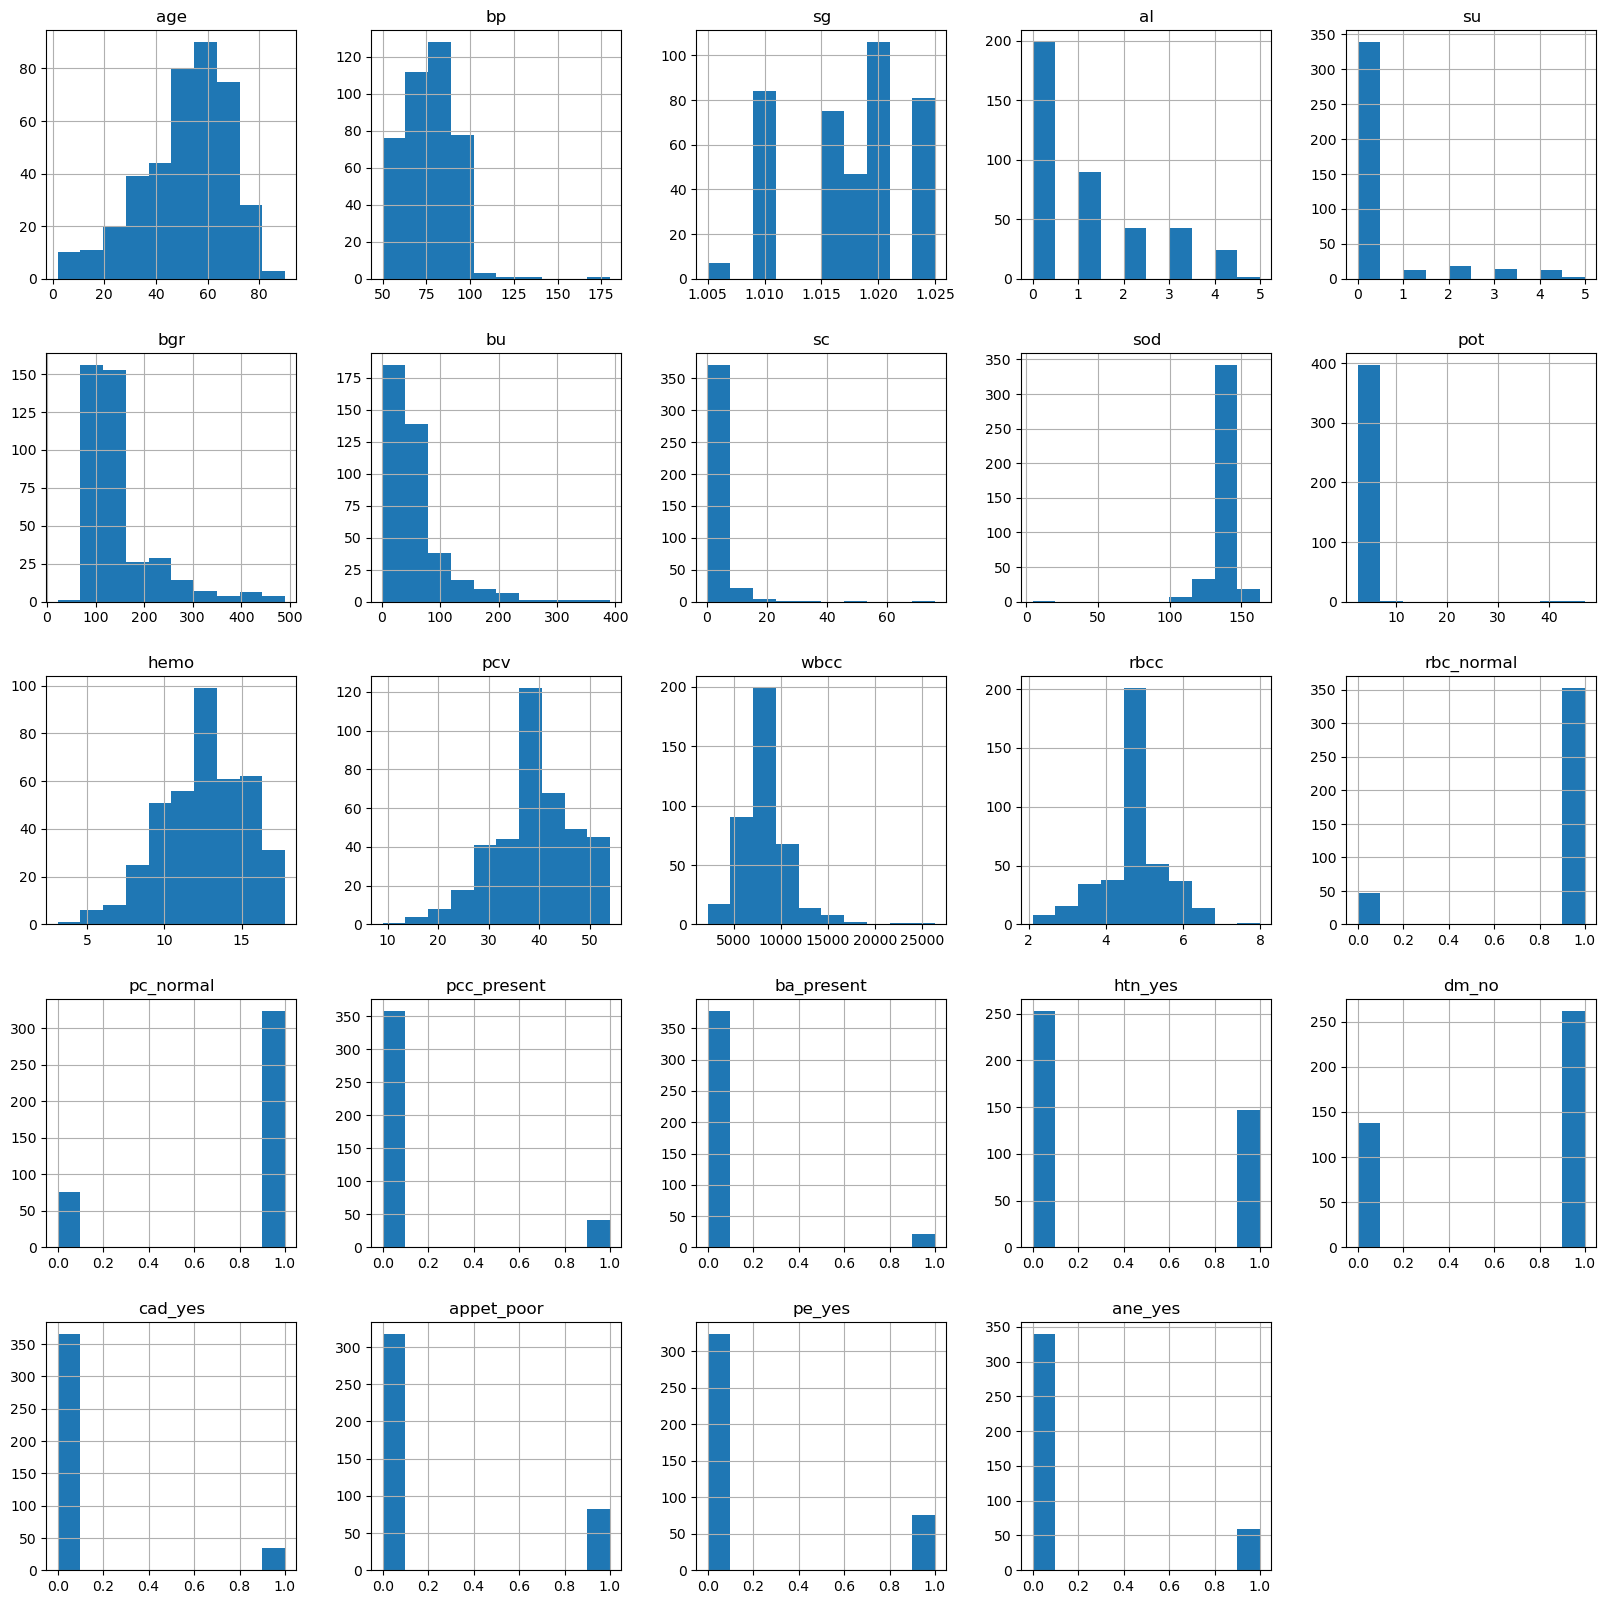

In [13]:
print("Histogram plots for the attributes:")
hist = X.hist(figsize=[20,20])
plt.show()

In [14]:
Data = pd.concat([X, y], axis=1)

In [15]:
Data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_no,cad_yes,appet_poor,pe_yes,ane_yes,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


## 6. Outlier Analysis

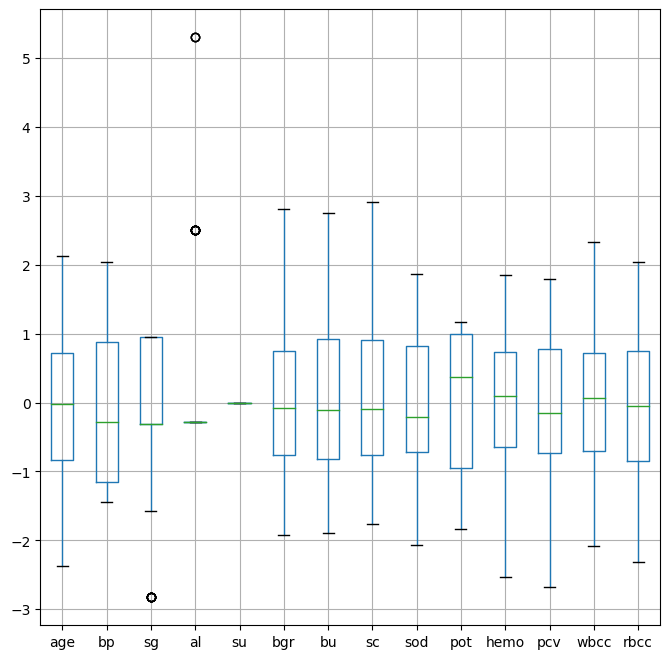

In [16]:
def remove_outliers(df, column_list):
    clean_df = df.copy()
    for column in column_list:
        Q1 = clean_df[column].quantile(0.25)
        Q3 = clean_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers from the dataframe
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
    return clean_df

Data = remove_outliers(Data, numeric_columns)
X = Data.drop('class', axis=1)
y = Data['class']

X[numeric_columns] = StandardScaler().fit_transform(X[numeric_columns])
boxplot = X[numeric_columns].astype(float).boxplot(figsize=[8,8])
plt.show()

## 4. Association Between Variables



The chi-square results show very low p-values for clinical symptoms and conditions such as 'htn_yes' (hypertension), 'appet_poor' (poor appetite), 'pe_yes' (pedal edema), and 'ane_yes' (anemia), indicating a strong association with CKD status.

The heatmap shows several variables are highly correlated with each other, such as 'bu' and 'sc' (blood urea and serum creatinine), which are both measures of kidney function. 

The test results indicate a significant association between the normality of red blood cell counts ('rbc_normal') and CKD status, with a low p-value. This suggests that 'rbc_normal' can be a valuable feature in predicting CKD presence.

Notably, the variables 'su' (sugar), 'bgr' (blood glucose random), 'bu' (blood urea), 'sc' (serum creatinine), and 'sod' (sodium) show a substantial number of outliers above the upper quartile, indicating that higher values of these variables might be associated with certain cases of CKD. 

## 7. Sub-group Analysis

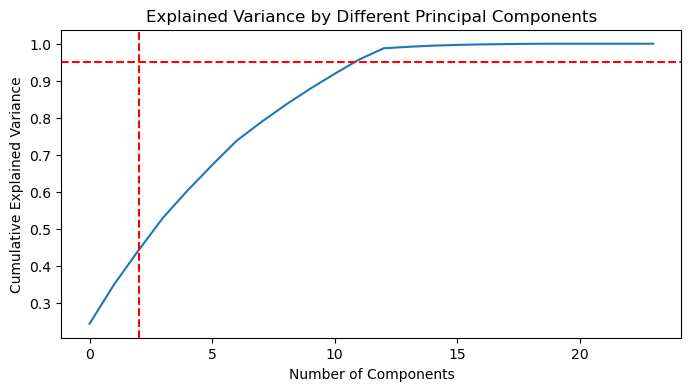

In [17]:
#validating the number of components for PCA
pca = PCA().fit(X) 
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')

# We use the 95 percent as the standard to choose the suitable components for PCA.
plt.axhline(y=0.95, color='r', linestyle='--')  
plt.axvline(x=2, color='r', linestyle='--')  
plt.show()

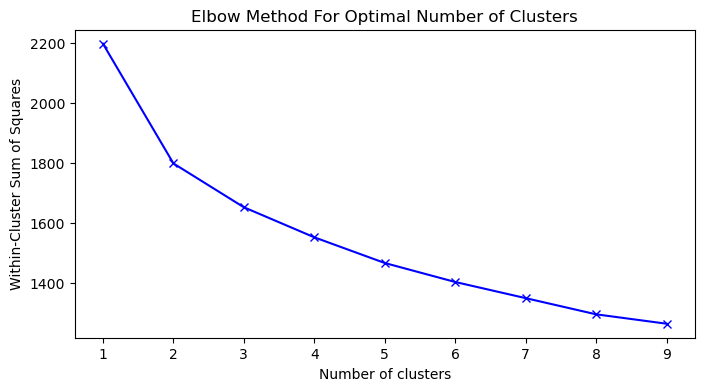

In [19]:
from sklearn.cluster import KMeans

# validating the clusters for Kmeans
sum_of_squared_distances = []
K = range(1, 10) 
for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=1)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


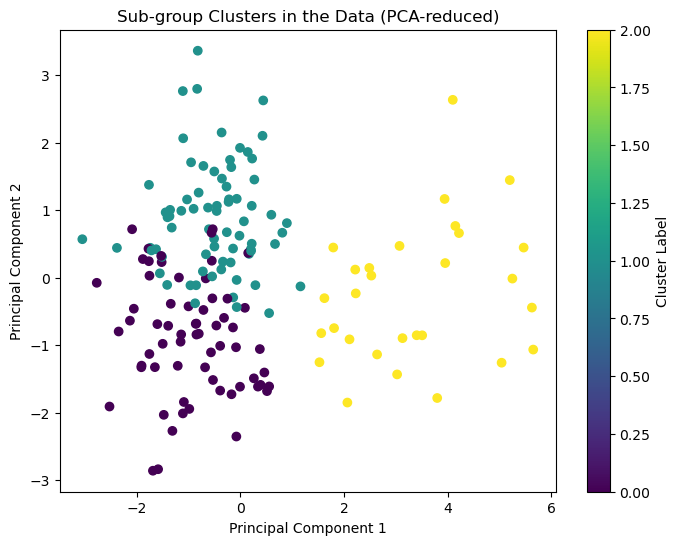

In [20]:
#Based upon the validation steps above, we could tell the most suitable components of PCA is 10 and clusters is 3.

pca = PCA(n_components=10)
data_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Sub-group Clusters in the Data (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## 8. Data Splitting

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [22]:
X_train

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_no,cad_yes,appet_poor,pe_yes,ane_yes
252,-0.185912,0.879897,0.947378,-0.286169,0.0,-1.365604,1.342207,-1.094490,1.239070,0.106652,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
284,-0.978923,0.879897,0.947378,-0.286169,0.0,-0.522573,0.345524,0.905716,0.204015,-0.600200,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
360,-0.846755,-1.437471,0.947378,-0.286169,0.0,-0.288397,0.511638,-1.427858,-1.245062,-0.776913,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
394,0.144510,0.879897,-0.310740,-0.286169,0.0,1.210324,1.093036,-0.427755,-0.417018,1.166929,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
149,1.135774,-0.278787,-0.310740,2.508190,0.0,1.303994,-0.318931,0.238980,-0.721582,0.508220,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1.334027,-1.437471,0.947378,-0.286169,0.0,0.648304,0.677752,0.572348,-0.417018,-0.953626,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
371,-1.309345,-1.437471,0.947378,-0.286169,0.0,-1.506109,1.425264,-1.427858,0.825048,1.166929,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
301,-0.251996,-1.437471,0.947378,-0.286169,0.0,-0.709913,0.013296,-0.094387,1.239070,0.283365,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
374,2.060954,0.879897,0.947378,-0.286169,0.0,-0.007387,0.926923,0.905716,1.032059,-1.307052,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

## 9. Classifier Choices

Decision tree classifier is interpretable and easy to visualize. Also, since the data we use is medical datasets and features are interacted and in a non-linear manner, the Decision Tree classifier is suitable to capture this non-linear patterns between features and the label.

Random Forest is an ensemble of decision trees and generally provides better predictive performance due to its ability to reduce overfitting by averaging multiple trees.

## 10. Performance Metrics

1. Accuracy
Accuracy could measure the proportion of true results among the total number of cases examined. It is a useful and straightforward metric.

2. F1 Score
The F1 score is the harmonic mean of precision and recall, which could provide a comprehensive evaluation on model's predictive capabilities.

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train.values.tolist(), y_train.values.tolist())
rf_pred = rf.predict(X_test.values.tolist())
print("\nRandom Forest Classifier Report:")
print(classification_report(y_test.values.tolist(), rf_pred))
print("Accuracy:", accuracy_score(y_test.values.tolist(), rf_pred))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.0


In [25]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train.values.tolist(), y_train.values.tolist())
dt_pred = dt.predict(X_test.values.tolist())
print("Decision Tree Classifier Report:")
print(classification_report(y_test.values.tolist(), dt_pred))
print("Accuracy:", accuracy_score(y_test.values.tolist(), dt_pred))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.71      0.83      0.77         6

    accuracy                           0.94        50
   macro avg       0.85      0.89      0.87        50
weighted avg       0.95      0.94      0.94        50

Accuracy: 0.94


## 11. Feature Selection

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfecv = RFECV(estimator=DecisionTreeClassifier(random_state=1), step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X.values.tolist(), y.values.tolist())
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 4


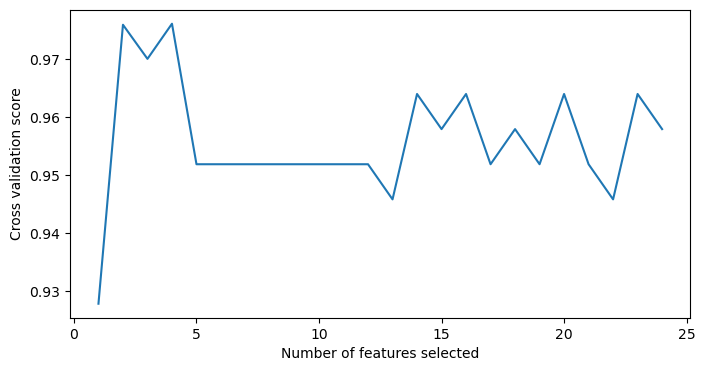

In [27]:
plt.figure(figsize=(8, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [28]:
selected_features = [f for f, s in zip(X.columns, rfecv.support_) if s]

opt_dt = DecisionTreeClassifier(random_state=1)
opt_dt.fit(X_train[selected_features].values.tolist(), y_train.values.tolist())

y_pred_opt = opt_dt.predict(X_test[selected_features].values.tolist())


In [29]:
print("Decision Tree Classifier Report after Feature Selection:")
print(classification_report(y_test.values.tolist(), y_pred_opt))
print("Accuracy:", accuracy_score(y_test.values.tolist(), y_pred_opt))

Decision Tree Classifier Report after Feature Selection:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.83      0.91         6

    accuracy                           0.98        50
   macro avg       0.99      0.92      0.95        50
weighted avg       0.98      0.98      0.98        50

Accuracy: 0.98


## 12. Classifier Comparision


The accuracy of 0.98 and a F1 score of 0.95 show that the Decision Tree performs well, it doesn't achieve the perfection of the Random Forest. The slight discrepancy in F1 score, predominantly driven by the lower recall for the minority class, indicates that the Decision Tree has missed a small proportion of positive cases (false negatives).

With an accuracy and F1 score of 1.00 across all classes, the Random Forest model, as claimed before, is more powerful than the Decision Tree Classifier. Both metrics being perfect suggest that the model was able to implement this binary classification task without any errors.

Also, with the assisstance of feature selection method implemented by RFE model, There is a significant improvement in the models predictive ability (All metrics are 1.00). This approach not only makes the model faster and less prone to overfitting but also enhances its applicability


## 13. Interpretable Classifier Insight

In [30]:
RF = RandomForestClassifier(n_estimators=100, random_state=1)
RF.fit(X.values.tolist(), y.values.tolist())

RandomForestClassifier(random_state=1)

In [31]:
importances = RF.feature_importances_

# Create a DataFrame for easier visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

        Feature  Importance
2            sg    0.230049
11          pcv    0.170902
10         hemo    0.105892
3            al    0.087222
7            sc    0.075706
5           bgr    0.047854
19        dm_no    0.044807
13         rbcc    0.036391
18      htn_yes    0.035079
15    pc_normal    0.028108
1            bp    0.022900
22       pe_yes    0.022838
8           sod    0.020447
21   appet_poor    0.015635
0           age    0.015473
9           pot    0.012607
6            bu    0.011792
12         wbcc    0.007074
14   rbc_normal    0.005779
23      ane_yes    0.003446
17   ba_present    0.000000
16  pcc_present    0.000000
20      cad_yes    0.000000
4            su    0.000000


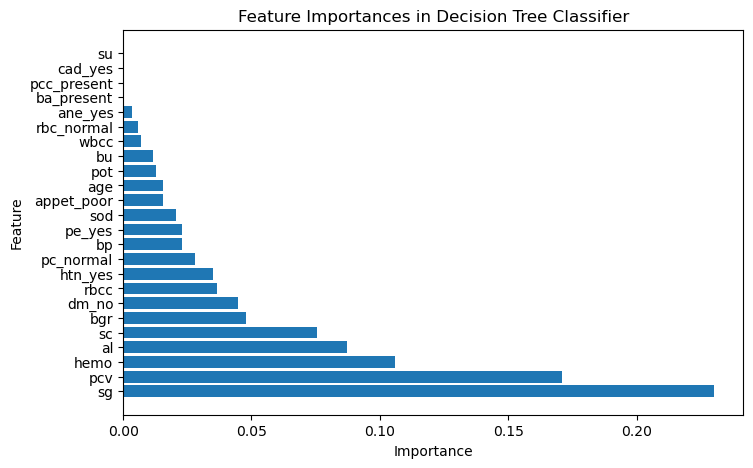

In [32]:
plt.figure(figsize=(8, 5))
plt.title('Feature Importances in Decision Tree Classifier')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The feature 'sg' (specific gravity) is identified as the most significant predictor, according to the dataset, 'sg' is a measure of urine density that can reflect the kidneys' ability to concentrate urine. Therefore, if there is found a significant deviations from the normal range in 'sg', it is usually associated with CKD.


Then, the second and the thrid important factors are 'hemo' (hemoglobin) and 'pcv' (packed cell volume). This suggests that the  indicative of kidney filtration function and blood quality, are critical in the model's ability to discern between CKD and non-CKD patients.

## 14. Bonus

In [33]:
X_clustered = [X[clusters == n] for n in range(kmeans.n_clusters)]
y_clustered = [y[clusters == n] for n in range(kmeans.n_clusters)]

In [34]:
# Since we have three clusters, we will use a Decision Tree Classifier to train each clusters (=0, =1, and =2) respectively.
DT = [DecisionTreeClassifier(random_state=1) .fit(X_c.values.tolist(), y_c.values.tolist()) for X_c, y_c in zip(X_clustered, y_clustered)]

In [35]:
for i, (dt, X_c, y_c) in enumerate(zip(DT, X_clustered, y_clustered)):
    dt_pred = dt.predict(X_c.values.tolist())
    print(f"Random Forest Classifier Report for Cluster {i}:")
    print(classification_report(y_c.values.tolist(), dt_pred))
    print("Accuracy:", accuracy_score(y_c.values.tolist(), dt_pred))

Random Forest Classifier Report for Cluster 0:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

Accuracy: 1.0
Random Forest Classifier Report for Cluster 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

Accuracy: 1.0
Random Forest Classifier Report for Cluster 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        26

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg 

## 15. Team Contributions
Zero Zhang: Data Acquisition, problem 1-4

Xueyuan Xu: Problem 5-9

Jianxing Wu: 10-13, bonus

## 16. GitHub Repository
[GitHub-3DA3](https://github.com/Zeroboki/3da3)